<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
sac_csv = '../data/sacramento_real_estate_transactions.csv'

In [2]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [3]:
# A:
sac = pd.read_csv(sac_csv)
sac.head()
# 985 Null rows, 12 columns
# found negative values in 'sq_ft' and 'price' (AC state only)  REMOVE ROW 703!
# found type='Unkown' rows where 'sq_ft' is 0:  REMOVE ROW 757!
# zip codes better stored as string types

# 'SACRAMENTO' is most represented city
# No of beds goes from 0 to 8 (108 have 0 - missing values)
# No of baths goes from 0 to 5 (108 have 0 - missing values)
# Sq_ft measurements, where 171 are missing value (i.e. '0')
# Four types of homes: Residential, Condo, Multi-Family and Unkown (1 which has no baths, beds or sq_ft but high price)

# Drop columns ['street', 'zip', 'state', 'sale_date', 'latitude', 'longitude', 'price'] for feature matrix

# 'price' is response variable (y)
# 'city', 'type', 'sq_ft', 'beds', 'baths' is features matrix (X)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
sac.rename(columns={'sq__ft' : 'sq_ft'}, inplace=True)

In [8]:
#sac.isnull().sum()
sac.dtypes
#sac['city'].value_counts(dropna=False)

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq_ft          int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [9]:
# Zip code is better as a string object (categorical)
sac['zip'] = sac['zip'].astype(str)

In [11]:
sac[sac['price'] < 1]
#sac[sac['type'] == 'Unkown']

,street,city,zip,state,beds,baths,sq_ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [12]:
sac.drop([703, 757], inplace = True)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

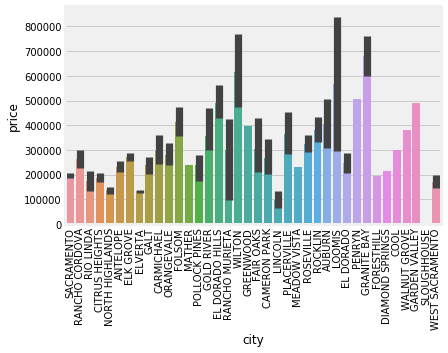

In [13]:
# A : 'city' vs 'price' (not the best predictor)

sns.barplot(x='city', y='price', data=sac);
plt.xticks(rotation=90);

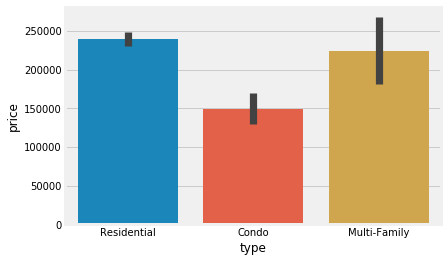

In [14]:
# A : 'type' vs 'price' (not the best predictor)
sns.barplot(x='type', y='price', data=sac);

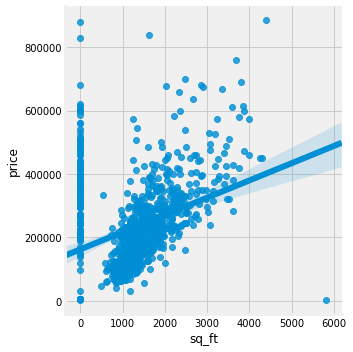

In [15]:
# A : 'sq_ft' vs 'price' - best predictor!

sns.lmplot(x='sq_ft', y='price', data=sac)
plt.show();

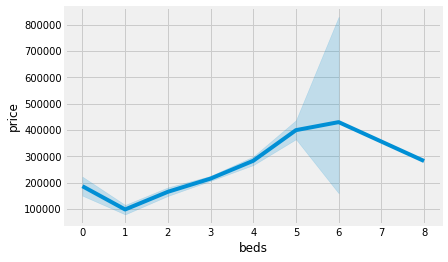

In [16]:
# A : 'beds' vs 'price'
sns.lineplot(x='beds', y='price', data=sac);

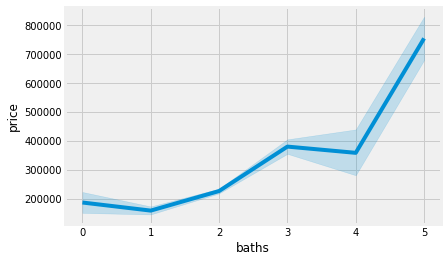

In [17]:
# A : 'baths' vs 'price'
sns.lineplot(x='baths', y='price', data=sac);

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [18]:
# A: sq_ft shows most positive linear relationship with price (as sq_ft goes up so does the price)
# 170 rows where square footage is not provided - REMOVE FOR MODEL DATA AS USELESS
sac[sac['sq_ft'] == 0]

,street,city,zip,state,beds,baths,sq_ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539
966,9197 CORTINA CIR,ROSEVILLE,95678,CA,3,2,0,Condo,Thu May 15 00:00:00 EDT 2008,220000,38.793152,-121.290025
970,3557 SODA WAY,SACRAMENTO,95834,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,224000,38.631026,-121.501879


In [19]:
sac_model = sac[sac.sq_ft != 0]
sac_model.head()

,street,city,zip,state,beds,baths,sq_ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [20]:
y = sac_model['price'] # target variable
X = np.array(sac_model['sq_ft']).reshape(-1, 1) # predictor variable

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [52]:
# A: The below function takes Series and/or arrays and uses SciKit-Learn library to get optimal slope and intercept

def intercept_and_coef(X, y):
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(X, y)
    
    coefficients = lr.coef_
    intercept = lr.intercept_
    
    return intercept, coefficients

In [53]:
#type(X)
intercept_and_coef(X, y)

(29984.361726519768, array([125.31418258]))

In [21]:
# To get the optimal Coefficient (slope) and y-intercept without SciKit-Learn

import numpy as np
import scipy.stats

# This takes lists only
def lin_reg(x, y):
    # Note that in SLR, the correlation coefficient multiplied by the std dev of y divided by std dev of x
    # is the optimal slope.
    beta_1 = (scipy.stats.pearsonr(x, y)[0]) * (np.std(y) / np.std(x))
    
    # Pearson Corr Coef returns tuple so it needs to be indexed
    # the optimal intercept is found by: mean(y) - b1 * mean(x)
    beta_0 = np.mean(y) - (beta_1 * np.mean(x)) 
    
    print('The Optimal Y Intercept is ', beta_0)
    print('The Optimal slope is ', beta_1)

In [22]:
Y = y.values
X = sac_model['sq_ft'].values
lin_reg(X, Y)

The Optimal Y Intercept is  29984.361726519768
The Optimal slope is  125.31418257510141


### 6. Interpret the intercept. Interpret the slope.

The intercept should be the constant *y* value that our data starts around, meaning from this point on, as *x* increases so does the *y* value from this point.

The intercept is an "offset". Without the intercept our regression line would be forced to pass through the origin.

The slope is the increase in target ('price') variable for a 1-unit increase in predictor variable ('sq_ft'). 

So, for every 1-unit sq_ft increase, there is an associated increase of ~125 dollars.

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

Prediction

You are a real estate agent with a separate database on house characteristics and locations.
You want to estimate the most likely price that one of these houses will sell at based on the model that we built using this data.

Inference

You work for an architecture company that wants to understand what characteristics of a house and what areas are associated with perceived value. You have some hypotheses about what makes a house valuable but you would like to test these hypotheses.

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [24]:
# Formula for prediction values: y = 29984.36 + 125.31x
# Create a list of predicted values

y_pred = []

for x in sac_model['sq_ft']:
    y = 29984.36 + (125.31 * x)
    y_pred.append(y)

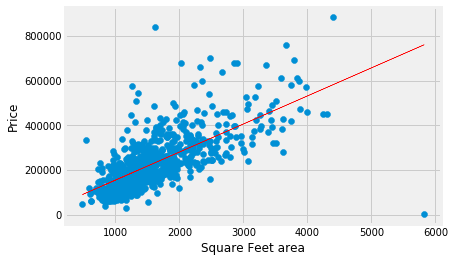

In [25]:
import matplotlib.pyplot as plt

plt.scatter(X, sac_model['price']);
plt.plot(X, y_pred, 'r', linewidth=0.5);
plt.xlabel('Square Feet area');
plt.ylabel('Price');
plt.show();

In [26]:
# Add Prediction values as new column
sac_model['y_predictions'] = y_pred

C:\Users\shmel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
# Add Residuals values as new column 
# (the difference between actual values and predicted values)
sac_model['residuals'] = abs(sac_model['price'] - sac_model['y_predictions'])

C:\Users\shmel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
sac_model['residuals'].mean()

60221.8004551046

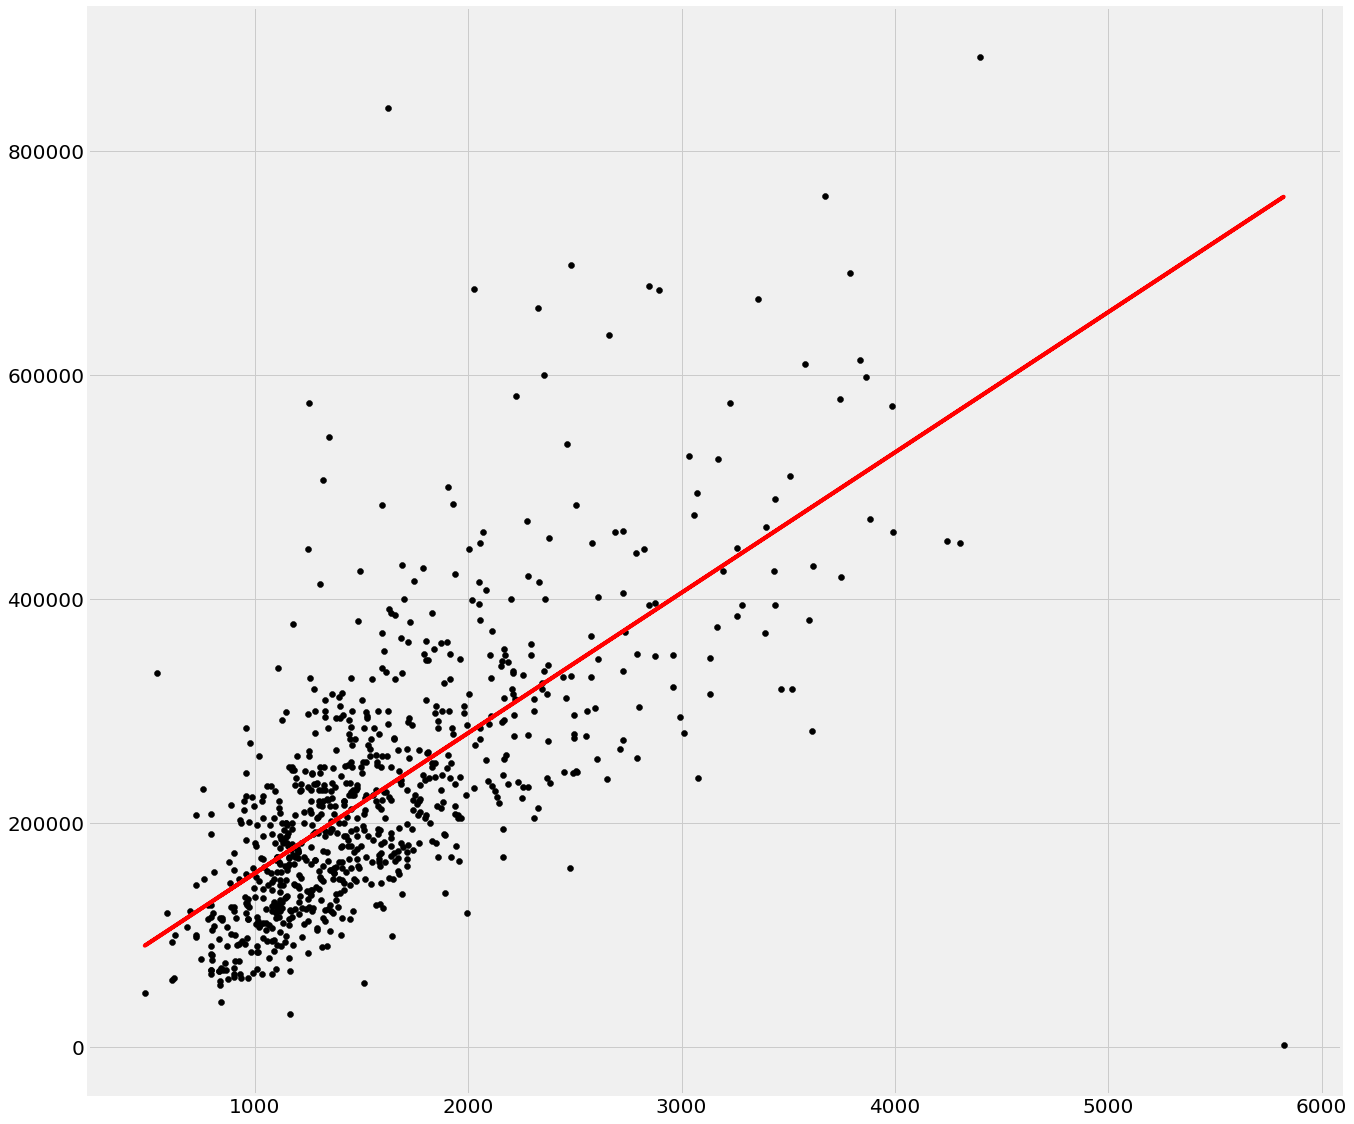

In [29]:
# Plot to show linear forecast
fig = plt.figure(figsize=(20,20))

# change fontsize of minor ticks label
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=20)

# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x=sac_model['sq_ft'], y=sac_model['price'], c='k')
ax.plot(sac_model['sq_ft'], sac_model['y_predictions'], color='r');

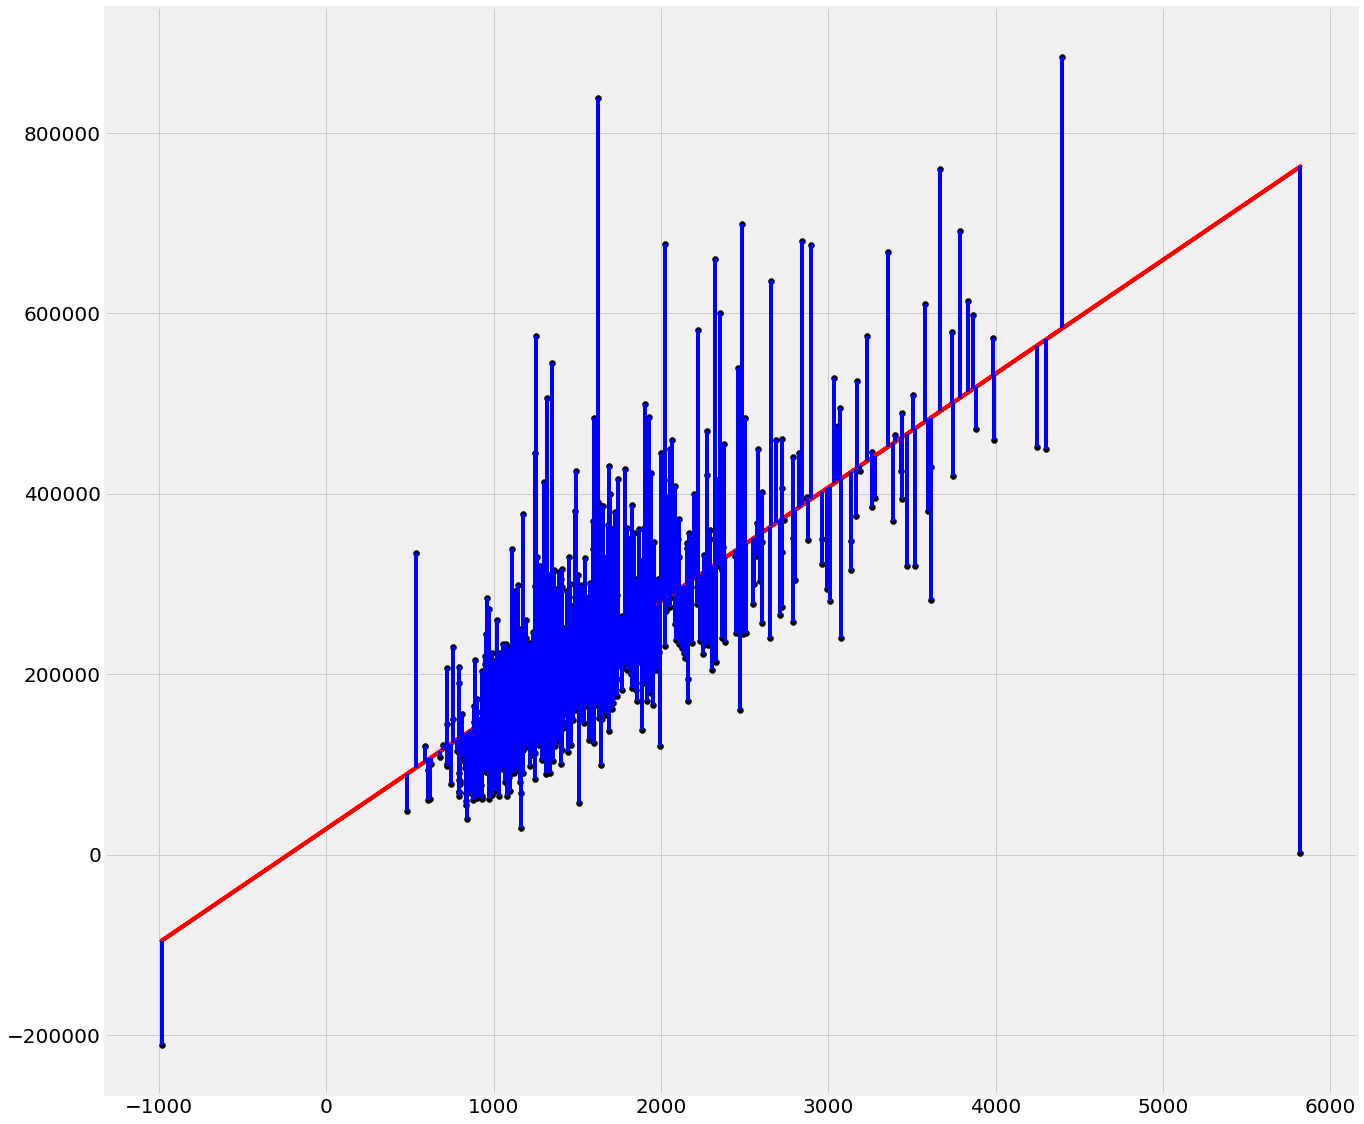

In [35]:
# Now, plot with residuals
fig = plt.figure(figsize=(20,20))

# change the fontsize of minor ticks label
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=20)

# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x=sac_model['sq_ft'], y=sac_model['price'], c='k')
ax.plot(sac_model['sq_ft'], sac_model['y_predictions'], color='r');

# iterate over predictions
for _, row in sac_model.iterrows():
    plt.plot((row['sq_ft'], row['sq_ft']), (row['price'], row['y_predictions']), 'b-')

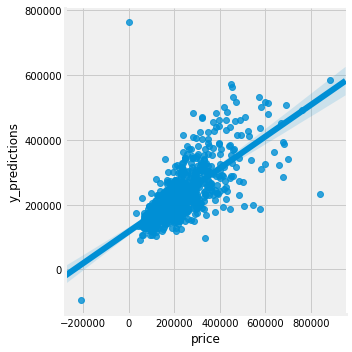

In [33]:
# One more plot, lets look how our Predictions compared to the true values.
sns.lmplot(x='price', y='y_predictions', data=sac_model);

In [ ]:
# Adding another independent variable could provide tighter fit of model to data predictions